In [60]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [61]:
data = pd.read_csv('/kaggle/input/medicine-recommendation-system-dataset/Training.csv', delimiter=',')
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [62]:
data = data.drop_duplicates()
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [63]:
le = LabelEncoder()
data['prognosis'] = le.fit_transform(data['prognosis'])
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,27
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,27
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,27
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,27


In [64]:
targets = np.unique(data['prognosis'])
targets

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [65]:
X = data.drop(columns = ["prognosis"])
y = data['prognosis']

In [66]:
weight_df = pd.read_csv("/kaggle/input/medicine-recommendation-system-dataset/Symptom-severity.csv", delimiter = ',')
weight_df

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [67]:
weight = np.array(weight_df['weight'])
weight = weight[:-1]

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [69]:
model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.03,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        enable_categorical=True
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=20,
    feature_weights=weight,
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

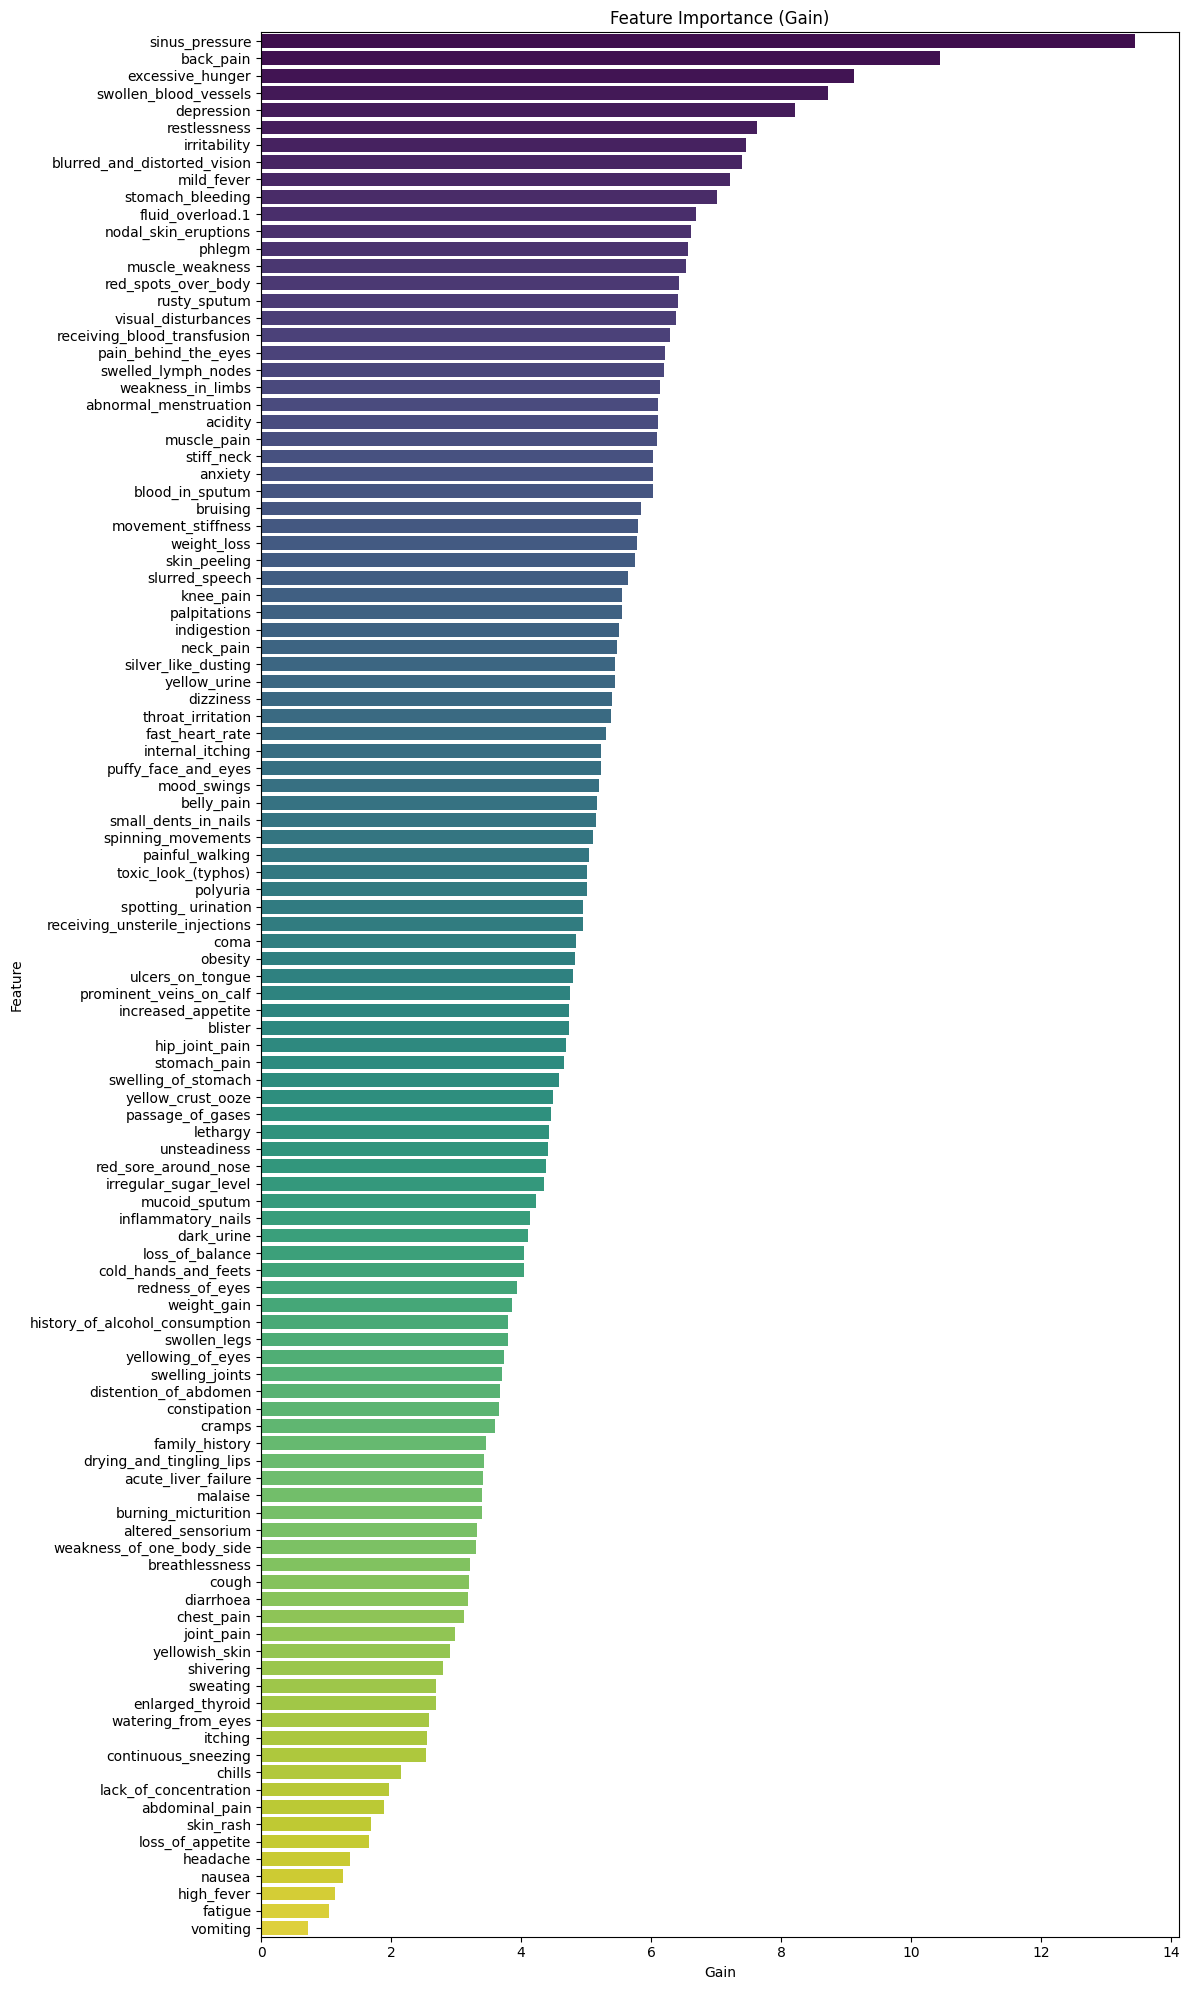

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 20))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importance (Gain)')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [71]:
top_50 = importance_df.head(50)
top_50_features = top_50['Feature'].tolist()
print(top_50_features)

['sinus_pressure', 'back_pain', 'excessive_hunger', 'swollen_blood_vessels', 'depression', 'restlessness', 'irritability', 'blurred_and_distorted_vision', 'mild_fever', 'stomach_bleeding', 'fluid_overload.1', 'nodal_skin_eruptions', 'phlegm', 'muscle_weakness', 'red_spots_over_body', 'rusty_sputum', 'visual_disturbances', 'receiving_blood_transfusion', 'pain_behind_the_eyes', 'swelled_lymph_nodes', 'weakness_in_limbs', 'abnormal_menstruation', 'acidity', 'muscle_pain', 'stiff_neck', 'anxiety', 'blood_in_sputum', 'bruising', 'movement_stiffness', 'weight_loss', 'skin_peeling', 'slurred_speech', 'knee_pain', 'palpitations', 'indigestion', 'neck_pain', 'silver_like_dusting', 'yellow_urine', 'dizziness', 'throat_irritation', 'fast_heart_rate', 'internal_itching', 'puffy_face_and_eyes', 'mood_swings', 'belly_pain', 'small_dents_in_nails', 'spinning_movements', 'painful_walking', 'toxic_look_(typhos)', 'polyuria']
